<h2>Assignment 1 - Linear Regression on Boston Housing Data</h2>

In [ ]:
# Elshaday Assefa
#The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [ ]:
!python --version

Python 3.6.9


In [ ]:
!cat /proc/cpuinfo

In [ ]:
!cat /proc/meminfo

In [ ]:
!nvidia-smi

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
!pip list 

In [ ]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)
#preprocessed
#print(target.shape)


# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)







<h4>Use scikit-learn library in the following cell</h4>

intercept: 
[30.24675099]

coefficients: 
[[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]

mse for training dataset:
4.652033184880168


mse for testing dataset:
4.9286021826653466


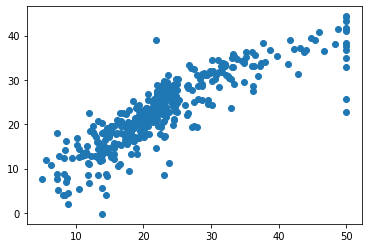

In [ ]:
# Task 1-1: use linear regression in sklearn
model = linear_model.LinearRegression()
model.fit(train_data, train_target)

# Task 1-2: show intercept and coefficents

print('intercept: ')
print(model.intercept_)
print('\ncoefficients: ')
print(model.coef_)


# Task 1-3: show errors on training dataset and testing dataset
predict1 = model.predict(train_data) #predict y values from given data

#plt.scatter(train_target, predict1)
mse1 = metrics.mean_squared_error(train_target, predict1, squared = False) #determine mse error from predicted y values against target
print('\nmse for training dataset:')
print(mse1)

print('\n')
predict2 = model.predict(test_data)



#MSE
mse2 = metrics.mean_squared_error(test_target, predict2, squared = False)
print('mse for testing dataset:')
print(mse2)



<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [ ]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) #function solving normal equation
    #print(w.shape)
    #print(w)
   # Ignore:   m = np.zeros(X.shape) this is a test for the gradient function
   # print(m.shape)
    return w
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.dot(X,w)#dot product of weights and training data

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)

train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights

w = myNormalEqualFun(train_data_intercept,train_target)



# Task 2-3: show intercept and coefficents
#COME BACK HERE!!!!!
print('intercept:')
print(w[0])
print('coefficients')
print(w[1:len(w)-1])



# Task 2-4: show errors on training dataset and testing dataset
train_prediction = myPredictFun(train_data_intercept, w) #y prediction using updated weights and train data
test_prediction = myPredictFun(test_data_intercept, w)#y prediction using updated weights and test data

print('mse for training dataset: ')
norm_mse1 = metrics.mean_squared_error(train_target, train_prediction, squared = False)
print (norm_mse1)

print('\nmse for testing dataset: ')
norm_mse2 = metrics.mean_squared_error(test_target, test_prediction, squared = False)
print(norm_mse2)


intercept:
[30.24675099]
coefficients
[[-1.13055924e-01]
 [ 3.01104641e-02]
 [ 4.03807204e-02]
 [ 2.78443820e+00]
 [-1.72026334e+01]
 [ 4.43883520e+00]
 [-6.29636221e-03]
 [-1.44786537e+00]
 [ 2.62429736e-01]
 [-1.06467863e-02]
 [-9.15456240e-01]
 [ 1.23513347e-02]]
mse for training dataset: 
4.6520331848801675

mse for testing dataset: 
4.928602182665711


<h4>Use numerical solution (basic gradient descent) to perform linear regression in the following cell</h4>

In [ ]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, learning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations
def myGradientDescentFun(X,y,learning_rate,numItrs, X_test, y_test):
  
  
  w = np.zeros(X.shape[1])# creates one dimensional array [number of features + bias]
  #w=np.random.rand(X.shape[1])
 
  w2 = w.reshape(-1,1) #vector to array
  
  
  n = X.shape[0] 
 
  iter = 0
  #print(w2.shape)
  losses = []
  mse = 0.0
  epochs = []
  losses_test=[]
 
  
  for i in range(numItrs ) : 
  
    y_prediction = myPredictFun(X,w2) #predict y values for weights before update
    ytest_prediction = myPredictFun(X_test, w2)
   
    er = y_prediction-y #use prediction to find error
    g = np.matmul(np.transpose(X),er)/float(n) #calculate gradient
    #g = -2/n * X.T.dot(er)
    #g = learning_rate*(np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))
   
    
    w2 = w2 - learning_rate*g #update weights
   
  
    #train_prediction = myPredictFun( X, w2)
    
    
   
  
    

    last = mse
    
    
    mse = np.sqrt(np.square(np.subtract(y, y_prediction)).mean()) #squared error of the difference btw y and y predict
    

  
    mse_test = np.sqrt(np.square(np.subtract(y_test,ytest_prediction)).mean()) #above but for testing data
    
  
  
  
    if ((mse > last) and (iter >1)): #find iteration that locates global minimum
      print('number of iterations: ')
      print(iter)
      break

    losses.append(mse)
    losses_test.append(mse_test)
    iter = iter +1
    epochs.append(iter)
    
    print(iter)
    plt.plot(epochs,losses, 'g',label = 'Training Error' )
    plt.plot(epochs, losses_test,'b', label = 'Testing Error' )
    plt.legend()
    plt.title('Cost Function')
    plt.xlabel('# of iterations')
    plt.ylabel('Loss')
    plt.show()
    print('-----------------------------------')
    
  return w2, losses, losses_test, epochs

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.matmul(X,w) #dot product of weights and training data

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss,loss_test, epochs = myGradientDescentFun(train_data_intercept,train_target,.05,300, test_data_intercept, test_target)
#print(w)
#print(loss)

# Task 3-3: show intercept and coefficents
print('intercept:')
print(w[0])
print('coefficients')
print(w[1:len(w)-1])


# Task 3-4: show errors on training dataset and testing dataset
train_prediction = myPredictFun(train_data_intercept, w)
print('Training Error:')
print(np.sqrt(np.square(np.subtract(train_target, train_prediction)).mean()))

test_prediction = myPredictFun(test_data_intercept, w)
print('Testing Error:')
print(np.sqrt(np.square(np.subtract(test_target, test_prediction)).mean()))

# Task 3-5: plot learning curves showing training errors and testing errors along iterations

plt.plot(epochs,loss,'g',label = 'Training Error')
plt.plot(epochs, loss_test, 'b',label = 'Testing Error')
plt.legend()
plt.title('Cost Function')
plt.xlabel('# of iterations')
plt.ylabel('Loss')
plt.show()

<h4>Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

In [ ]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 4-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X,y,learning_rate,epoches, batchsize, X_test, y_test):
    train_size = X.shape[0]
    test_size = X_test.shape[0] #testing data sizes
    train_batches = int(train_size/batchsize) +1#finding number of batches to iterate through
    test_batches = int(test_size/batchsize) +1 
    m = batchsize #chose batchsize
    train_leftover = train_size % m #last batch doesnt have the same ammount of data sets as previous
    print(batchsize)
    w = np.zeros(X.shape[1])# creates one dimensional array [number of features + bias]
    w2 = w.reshape(-1,1) #array to vector
  
    
    loss = []
    mse = 0.0
    epochs = []
    loss_test=[]
    iter = 0
    
    for i in range(epoches) :
      for j in range(train_batches):
        if j!= train_batches: #condition: all batches except last batch
          y_prediction = myPredictFun(X[(j*m):((j+1)*m)],w2)
          y_prediction_all = myPredictFun(X,w2) #predict y against whole training data set
          ytest_prediction_all = myPredictFun(X_test, w2)#predict y against whole testing data set
          #print(y_prediction.shape)
          er = y_prediction - y[(j*m):((j+1)*m)] #use prediction and true y to find error
          g = np.matmul(np.transpose(X[(j*m):((j+1)*m)]),er)/float(m) #calculate gradient
          w2 = w2 - learning_rate*g #update weights
           
          losses_tr = np.sqrt(np.square(np.subtract(y, y_prediction_all)).mean()) #current training error
          losses_test = np.sqrt(np.square(np.subtract(y_test, ytest_prediction_all)).mean())#current testing error
          loss.append(losses_tr) #array of training errors
          loss_test.append(losses_test)#array of testing errors
          iter = iter+1 #count number of iterations for each epoch
          epochs.append(iter) #add to epoch array (used for plotting)
          
          plt.plot(epochs, loss, 'g', label= 'Training Error')
          plt.plot(epochs,loss_test,'b', label= 'Testing Error')
          plt.title('Cost Function')
          plt.xlabel('Batches per Epoch Updates')
          plt.ylabel('Loss')
          #plt.legend()
          #plt.show()
          
        else: #last batch in epoch
          y_prediction = myPredictFun(X[(j*m):((j*m)+ training_leftover)],w2) #same as above but for leftover training data
          y_prediction_all = myPredictFun(X,w2)
          ytest_prediction_all = myPredictFun(X_test, w2)

          er = y_prediction - y[(j*m):((j*m)+ training_leftover)] #use prediction and true y to find error
          g = np.matmul(np.transpose(X[(j*m):((j*m)+ training_leftover)]),er)/float(training_leftover) #calculate gradient
          w2 = w2 - learning_rate*g #update weights

          losses_tr = np.sqrt(np.square(np.subtract(y, y_prediction_all)).mean())
          losses_test = np.sqrt(np.square(np.subtract(y_test, ytest_prediction_all)).mean())
          loss.append(losses_tr)
          loss_test.append(losses_test)
          iter = iter+1
          epochs.append(iter)
          
          plt.plot(epochs, loss, 'g', label= 'Training Error')
          plt.plot(epochs,loss_test,'b', label= 'Testing Error')
          plt.title('Cost Function')
          plt.xlabel('Batches per Epoch Updates')
          plt.ylabel('Loss')
          #plt.legend()
          #plt.show()
          



   

 
    
    return w2, loss, loss_test, epochs

# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.matmul(X,w) #dot product of weights and training data

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)
#print(train_data_intercept.shape[1])
train_size = train_data_intercept.shape[0]
#print(test_data_intercept.shape[1])
#print ('Sizes: ')
test_size = test_data_intercept.shape[0]
train_last_batch = train_size % 15
test_last_batch = test_size % 15
train_batches = int(train_size / 15) + 1
test_batches = int(test_size/ 15) + 1





# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss, loss_test, epochs = myGradientDescentFun(train_data_intercept,train_target,.05,10,15,test_data_intercept, test_target)
#print(w)
#print(loss[0:5])

# Task 4-3: show intercept and coefficents
print('intercept:')
print(w[0])
print('coefficients')
print(w[1:len(w)-1])

# Task 4-4: show errors on training dataset and testing dataset
train_prediction = myPredictFun(train_data_intercept, w) #training prediction of final weights
print('Training Error:')
print(np.sqrt(np.square(np.subtract(train_target, train_prediction)).mean())) #training error

test_prediction = myPredictFun(test_data_intercept, w)#testing prediction of final weights
print('Testing Error:')
print(np.sqrt(np.square(np.subtract(test_target, test_prediction)).mean())) #testing error

# Task 4-5: plot learning curves showing training errors and testing errors along bath
plt.plot(epochs,loss,'g',label = 'Training Error')
plt.plot(epochs, loss_test, 'b', label = 'Testing Error' )
plt.title('Cost Function')
plt.xlabel('Batches per Epoch Updates')
plt.ylabel('Loss')
plt.legend()
plt.show()